# Author

Ronen H

# Import Libraries

In [1]:
import pandas as pd # Imports the pandas module.
from datetime import datetime # Imports the datetime class from the datetime module.
import matplotlib.pyplot as plt # Imports the matplotlib.pyplot module.
import numpy as np # Imports the numpy module.

## Process Daily Adult Salmon Counts Data and Daily River Environment Data at Bonneville Dam Over the Last Decade

In [2]:
# From the yearly daily adult salmon counts data at Bonneville Dam from
# 2012 to 2022 given by counts_filepaths, the function returns
# the daily adult salmon counts data over the last decade as
# a pandas DataFrame. 
def get_daily_counts(counts_filepaths):

    daily_counts = None
  
    for i in range(len(counts_filepaths)):

        # Obtains the daily adult salmon count at Bonneville Dam
        # for the year as a pandas DataFrame.
        daily_counts_year = pd.read_csv(counts_filepaths[i],
                                        index_col='Date',
                                        parse_dates=['Date'])
  
        # Replaces daily adult salmon count values of -1 with
        # numpy nan.
        daily_counts_year = daily_counts_year.replace(-1, np.nan)

        if daily_counts is None:
            daily_counts = daily_counts_year
        else:
            # Combines the accumulated daily adult salmon
            # counts data with the daily adult salmon count
            # data for the year.
            daily_counts = pd.concat([daily_counts,
                                      daily_counts_year])

    return daily_counts

In [3]:
# The filepaths for the yearly daily adult salmon counts
# data at Bonneville Dam from the years 2012 to 2022.
counts_filepaths = ['adultdaily_2012.csv', 'adultdaily_2013.csv',
                    'adultdaily_2014.csv', 'adultdaily_2015.csv',
                    'adultdaily_2016.csv', 'adultdaily_2017.csv',
                    'adultdaily_2018.csv', 'adultdaily_2019.csv',
                    'adultdaily_2020.csv', 'adultdaily_2021.csv',
                    'adultdaily_2022.csv']
counts_filepaths = ['daily_salmon_counts_env_data/' + filepath 
                    for filepath in counts_filepaths]

In [4]:
# Obtains the daily adult salmon counts data of Chinook, Coho, and Sockeye
# at Bonneville Dam over the last decade.
daily_counts = get_daily_counts(counts_filepaths).loc[:, ['Chin', 'Coho', 'Sock']]

In [5]:
display(daily_counts)

,Chin,Coho,Sock
Date,,,
2012-01-01,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN
...,...,...,...
2022-11-12,4.0,61.0,NaN
2022-11-13,4.0,23.0,NaN
2022-11-14,1.0,23.0,NaN


In [6]:
# From the yearly daily river environment data at Bonneville Dam from
# 2012 to 2022 given by env_filepaths, the function returns
# the daily river environment data over the last decade as
# a pandas DataFrame. 
def get_daily_env(env_filepaths):

    daily_env = None

    for i in range(len(env_filepaths)):

        # Obtains the daily river environment at Bonneville Dam
        # for the year as a pandas DataFrame.
        daily_env_year = pd.read_csv(env_filepaths[i],
                                     index_col='Date',
                                     parse_dates=['Date'])

        if daily_env is None:
            daily_env = daily_env_year
        else:
            # Combines the accumulated daily river environment
            # data with the daily river environment data
            # for the year.
            daily_env = pd.concat([daily_env,
                                   daily_env_year])

    return daily_env

In [7]:
# The filepaths for the yearly daily river environment
# data at Bonneville Dam from the years 2012 to 2022.
env_filepaths = ['riverdaily_2012.csv', 'riverdaily_2013.csv',
                 'riverdaily_2014.csv', 'riverdaily_2015.csv',
                 'riverdaily_2016.csv', 'riverdaily_2017.csv',
                 'riverdaily_2018.csv', 'riverdaily_2019.csv',
                 'riverdaily_2020.csv', 'riverdaily_2021.csv',
                 'riverdaily_2022.csv']
env_filepaths = ['daily_salmon_counts_env_data/' + filepath
                 for filepath in env_filepaths]

In [8]:
# Obtains the daily dissolved gas data at Bonneville Dam over the last decade.
daily_env = get_daily_env(env_filepaths).loc[:, ['Dissolved Gas (mmHg)']]

In [9]:
display(daily_env)

,Dissolved Gas (mmHg)
Date,
2012-01-01,NaN
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
...,...
2022-11-12,NaN
2022-11-13,NaN
2022-11-14,NaN


## Time Series Plots of Daily Counts of Adult Salmon Over the Last Decade and Daily Dissolved Gas at Bonneville Dam Over the Last Decade

In [10]:
# Given the daily adult salmon counts data over the last decade daily_counts,
# daily dissolved gas data over the last decade daily_env, the function plots
# the daily adult Chinook salmon counts, the daily adult Coho salmon counts,
# and the daily Sockeye salmon counts over time for the top plot and plots the
# daily dissolved gas over time for the bottom plot.
def plot_counts_dissolved_gas_over_time(daily_counts, daily_env, chinook_c='limegreen',
                                        coho_c='deepskyblue', sockeye_c='orangered',
                                        dissolved_gas_c='blueviolet', dissolved_gas_pct_c='deeppink'):

    # Set up the figure of the top plot and bottom plot.
    fig, ax = plt.subplots(nrows=2, figsize=(25, 25))

    # Plots the daily adult Chinook salmon counts, the daily adult Coho salmon
    # counts, and the daily Sockeye salmon counts over time for the top plot.
    ax[0].plot(daily_counts.index, daily_counts['Chin'], c=chinook_c)
    ax[0].plot(daily_counts.index, daily_counts['Coho'], c=coho_c)
    ax[0].plot(daily_counts.index, daily_counts['Sock'], c=sockeye_c)
    ax[0].legend(['Chinook', 'Coho', 'Sockeye'], fontsize=14)
    ax[0].set_xlabel('Date', fontsize=14)
    ax[0].set_ylabel('Count', fontsize=14)
    ax[0].set_title('Daily Counts of Adult Salmon at Bonneville Dam Over the Last Decade', fontsize=16)
    ax[0].tick_params(labelsize=14)
    ax[0].set_xlim(datetime(2012, 1, 1), datetime(2022, 12, 31))
    ax[0].grid()

    # Plots the daily dissolved gas over time for the bottom plot.
    ax[1].plot(daily_env.index, daily_env['Dissolved Gas (mmHg)'], c=dissolved_gas_c)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].set_ylabel('Dissolved Gas (mmHg)', fontsize=14)
    ax[1].set_title('Daily Dissolved Gas at Bonneville Dam Over the Last Decade', fontsize=16)
    ax[1].tick_params(labelsize=14)
    ax[1].set_xlim(datetime(2012, 1, 1), datetime(2022, 12, 31))
    ax[1].grid()

    plt.savefig('daily_salmon_counts_env_figures/vis_counts_dissolved_gas_over_time.jpg', bbox_inches='tight', dpi=500)
    plt.show()

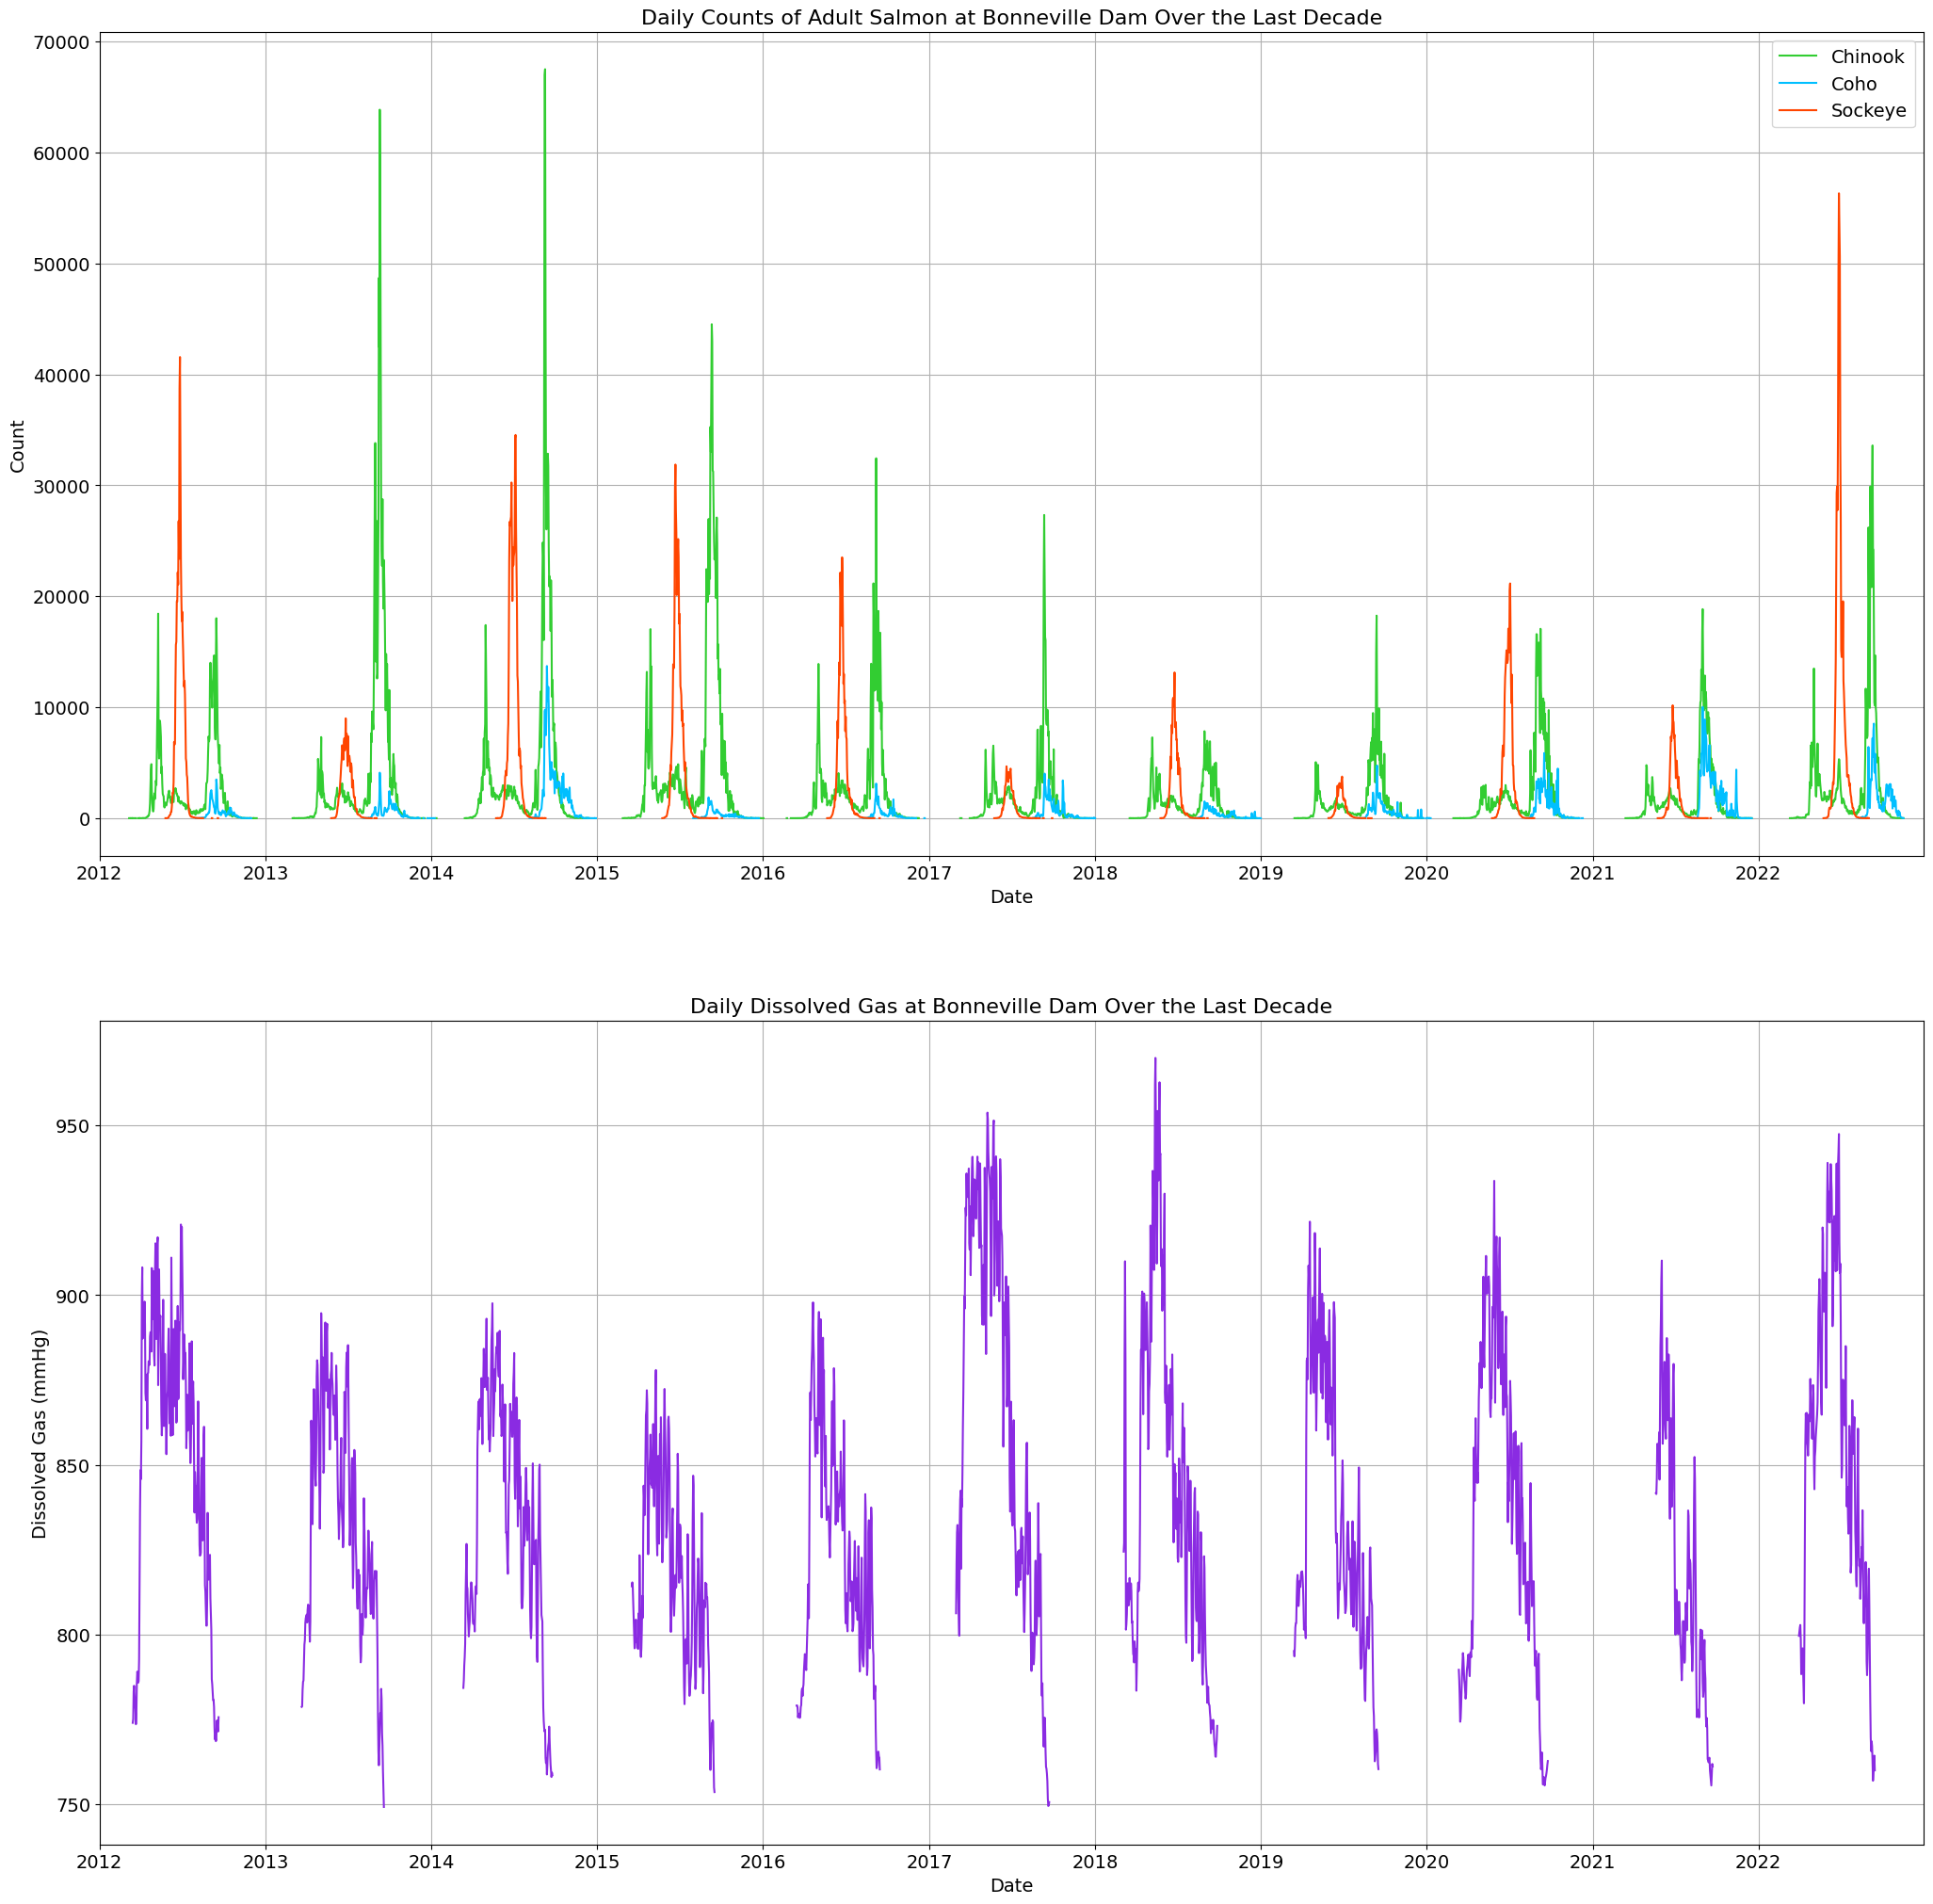

In [11]:
# Plots the daily adult Chinook salmon counts, the daily adult Coho salmon counts,
# and the daily Sockeye salmon counts at Bonneville Dam over time for the top plot
# and plots the daily dissolved gas at Bonneville Dam over time for the bottom plot.
plot_counts_dissolved_gas_over_time(daily_counts, daily_env)

## Scatter Plots of Daily Adult Salmon Counts and Daily Dissolved Gas Over the Last Decade

In [12]:
# Given the daily adult salmon counts data over the last decade daily_counts,
# daily dissolved gas data over the last decade daily_env, and the salmon species
# salmon_type, the function plots the scatter plot of the daily adult salmon species
# counts and the daily dissolved gas with the marker color being the given c.
def plot_counts_dissolved_gas_by_year(daily_counts, daily_env, salmon_type, c):

    # Set up the figure of the plot.
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plots the scatter plot of the daily adult salmon species
    # counts and the daily dissolved gas.
    counts = daily_counts
    dissolved_gas = daily_env
    if len(counts.index.values) > len(dissolved_gas.index.values):
        counts = daily_counts.loc[dissolved_gas.index.values]
    elif len(dissolved_gas.index.values) > len(counts.index.values):
        dissolved_gas = daily_env.loc[counts.index.values]
    ax.scatter(dissolved_gas['Dissolved Gas (mmHg)'], counts[salmon_type], c=c)
    ax.set_xlabel('Dissolved Gas (mmHg)', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(labelsize=14)
    ax.set_xlim(740, 960)
    salmon_name = salmon_type
    if salmon_name == 'Chin':
        salmon_name = 'Chinook'
    elif salmon_name == 'Sock':
        salmon_name = 'Sockeye'
    ax.set_title('Scatter Plot of Daily Count of Adult ' + salmon_name + ' Salmon versus Daily Dissolved Gas Over the Last Decade', fontsize=16)
    ax.grid()

    plt.savefig('daily_salmon_counts_env_figures/vis_' + salmon_name, bbox_inches='tight', dpi=500)
    plt.show()

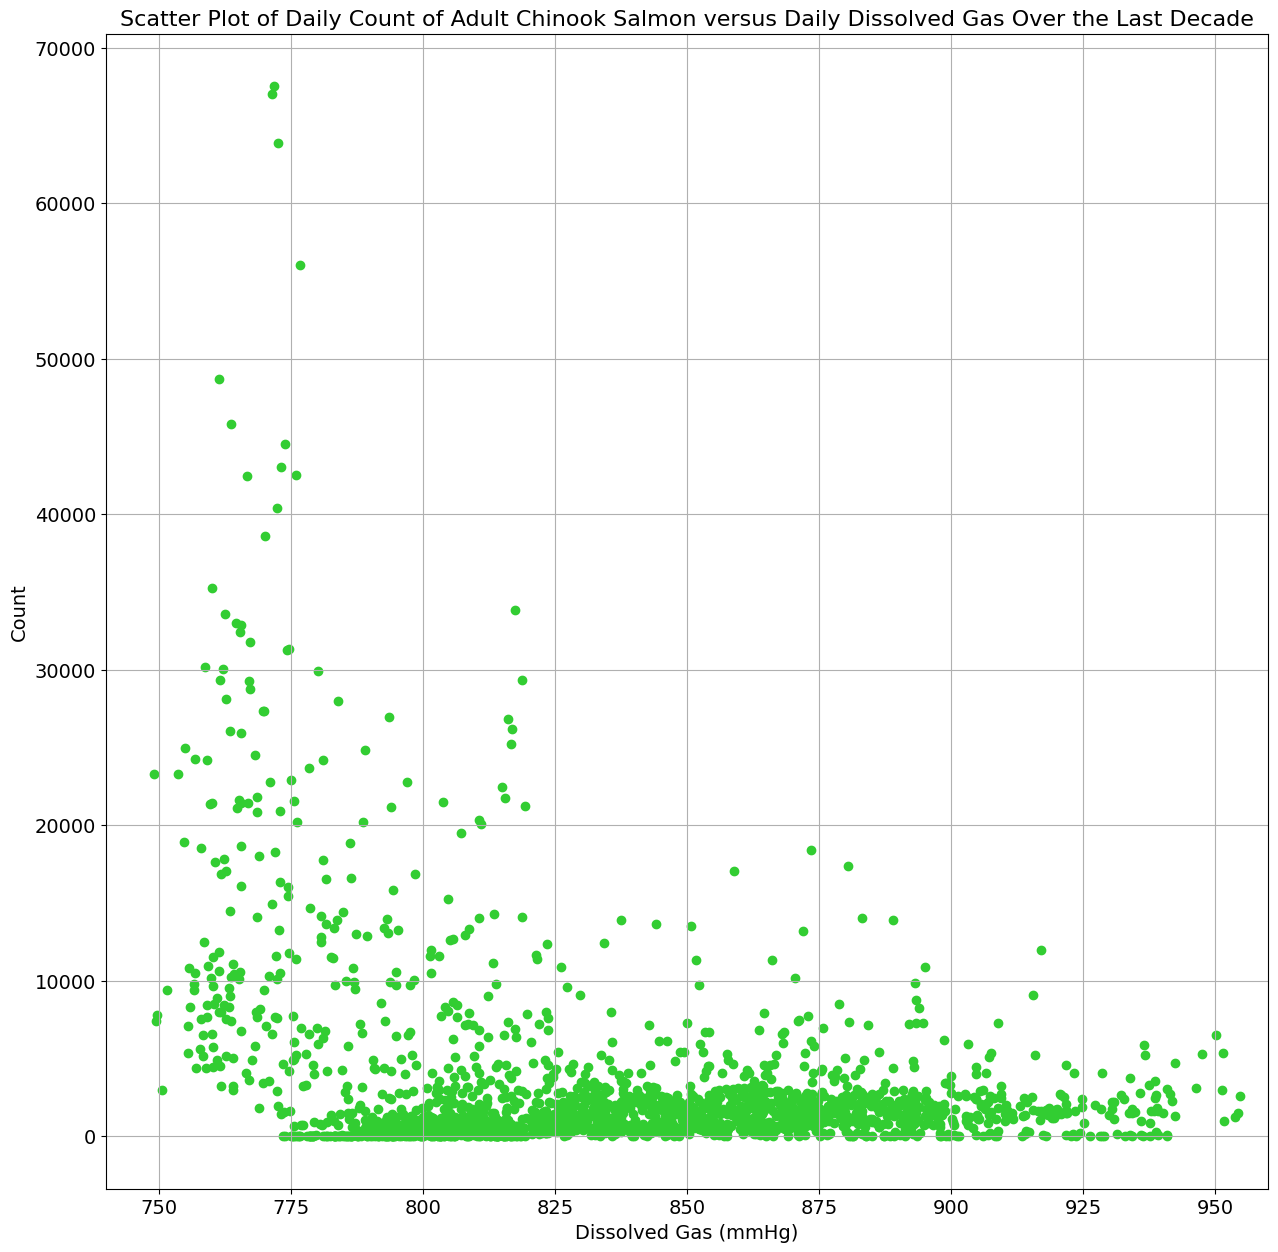

In [13]:
# Plots the scatter plot of the daily adult Chinook salmon
# counts and the daily dissolved gas at Bonneville Dam.
plot_counts_dissolved_gas_by_year(daily_counts, daily_env, 'Chin', 'limegreen')

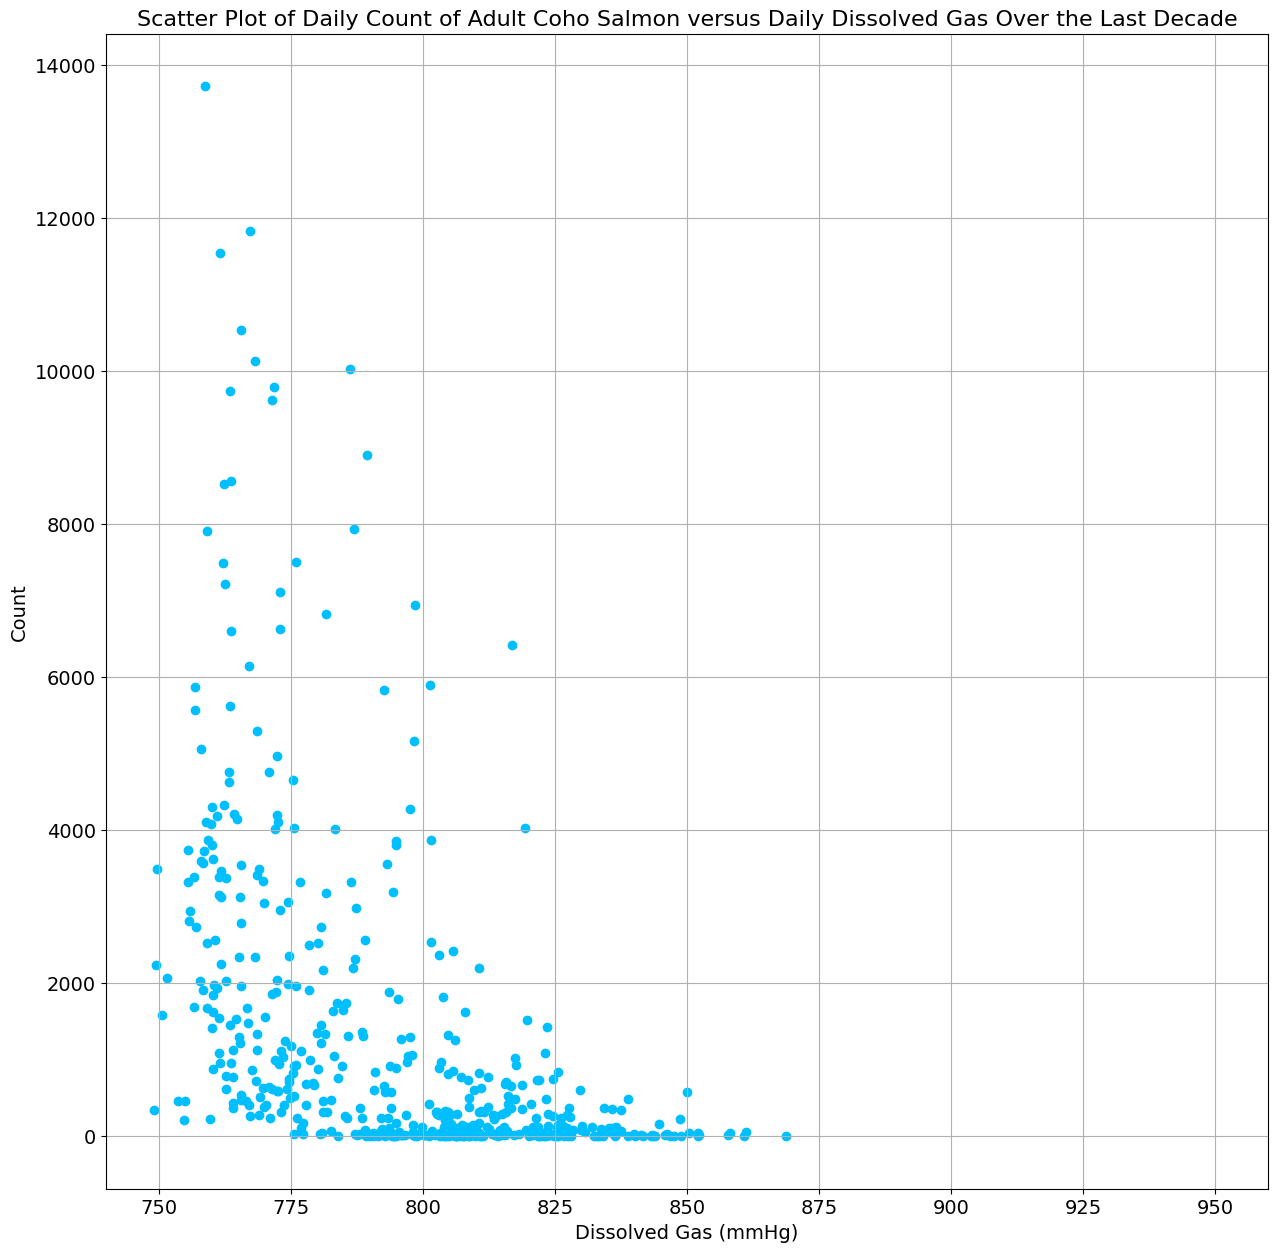

In [14]:
# Plots the scatter plot of the daily adult Coho salmon
# counts and the daily dissolved gas at Bonneville Dam.
plot_counts_dissolved_gas_by_year(daily_counts, daily_env, 'Coho', 'deepskyblue')

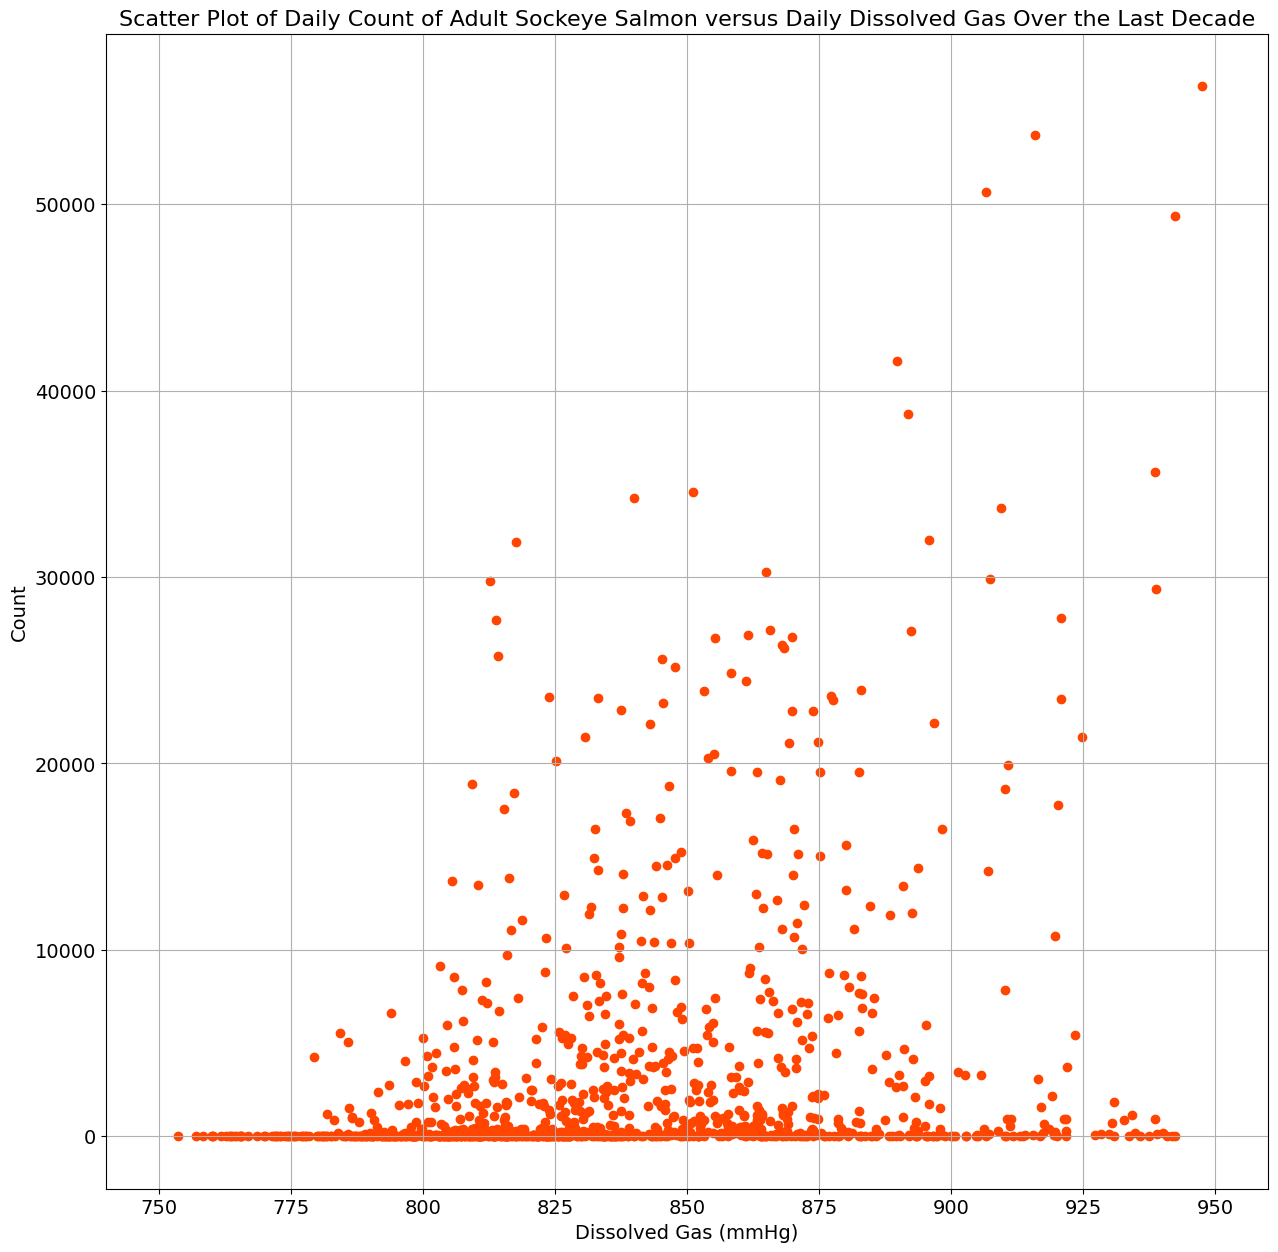

In [15]:
# Plots the scatter plot of the daily adult Sockeye salmon
# counts and the daily dissolved gas at Bonneville Dam.
plot_counts_dissolved_gas_by_year(daily_counts, daily_env, 'Sock', 'orangered')